In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
train_df = pd.read_csv("/kaggle/input/regipa/train_regipa.csv")
test_df = pd.read_csv("/kaggle/input/regipa/test_regipa.csv", index_col="Index")

In [3]:
test_df.shape

(8941, 2)

In [4]:
train_df.shape

(30311, 4)

In [5]:
train_df.head()

,Index,District,Contents,IPA
0,rng_0,Rangpur,"লেখিয়্যা, কালি দিয়্যা, সেই সুন্দর করিয়া, এখন স...","lekʰɪʲt̪ɐ, kɐlɪ d̪ɪkt̪ɐ, ʃe͡ɪ̯ ʃund̪ɔɾ koɾɪʲɐ,..."
1,rng_1,Rangpur,"হ, একটা ফিল্ডিং গ্রুপ ছিলো।","ho, ɛktɐ pʰɪldɪŋ gɾup cʰɪlo।"
2,rng_2,Rangpur,"হ, ওরে কতা <> বুজচি বিষয়টা, ওয় তো এখনও বেরাজিল...","ho, oɾe kɔt̪ɐ <> buɟcɪ bɪʃɔʲtɐ, oe̯ t̪o ɛkʰono..."
3,rng_3,Rangpur,"সিডায়, ওই সমায় আমরা ওই কানির রুমটাত যকন আছনো এ...","ʃɪdɐe̯, o͡ɪ̯ ʃɔmɐe̯ ɐmɾɐ o͡ɪ̯ kɐnɪɾ ɾumtɐt̪ ɟɔ..."
4,rng_4,Rangpur,"যকন কী ইয়্যা হইছিল, ওই যে সুমন আর হইলো আলম <> ...","ɟɔkon kɪ ɪʲlɐ ho͡ɪ̯cʰɪlo, o͡ɪ̯ ɟe ʃumɔn ɐɾ ho͡..."


In [6]:
train_df = train_df.drop(columns=['Index','District'])

In [7]:
train_df.head()

,Contents,IPA
0,"লেখিয়্যা, কালি দিয়্যা, সেই সুন্দর করিয়া, এখন স...","lekʰɪʲt̪ɐ, kɐlɪ d̪ɪkt̪ɐ, ʃe͡ɪ̯ ʃund̪ɔɾ koɾɪʲɐ,..."
1,"হ, একটা ফিল্ডিং গ্রুপ ছিলো।","ho, ɛktɐ pʰɪldɪŋ gɾup cʰɪlo।"
2,"হ, ওরে কতা <> বুজচি বিষয়টা, ওয় তো এখনও বেরাজিল...","ho, oɾe kɔt̪ɐ <> buɟcɪ bɪʃɔʲtɐ, oe̯ t̪o ɛkʰono..."
3,"সিডায়, ওই সমায় আমরা ওই কানির রুমটাত যকন আছনো এ...","ʃɪdɐe̯, o͡ɪ̯ ʃɔmɐe̯ ɐmɾɐ o͡ɪ̯ kɐnɪɾ ɾumtɐt̪ ɟɔ..."
4,"যকন কী ইয়্যা হইছিল, ওই যে সুমন আর হইলো আলম <> ...","ɟɔkon kɪ ɪʲlɐ ho͡ɪ̯cʰɪlo, o͡ɪ̯ ɟe ʃumɔn ɐɾ ho͡..."


In [8]:
test_df.head()

,District,Contents
Index,,
0,Rangpur,এলা সবায় সবার হাতোত <> অসহায় মানুষ আচে?
1,Rangpur,কেউ কারো ইয়া নাই।
2,Rangpur,"এলা ওই যে, কাইলকা ব্যাটায় ইপতারি আনচে, খাইচোং,..."
3,Rangpur,আর মুই আগোত কী করচিনু?
4,Rangpur,"<> আগের কতা বাদ দেও, এলা নাই।"


In [9]:
test_df = test_df.drop(columns=['District'])

In [10]:
test_df.head()

,Contents
Index,
0,এলা সবায় সবার হাতোত <> অসহায় মানুষ আচে?
1,কেউ কারো ইয়া নাই।
2,"এলা ওই যে, কাইলকা ব্যাটায় ইপতারি আনচে, খাইচোং,..."
3,আর মুই আগোত কী করচিনু?
4,"<> আগের কতা বাদ দেও, এলা নাই।"


In [11]:
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

In [12]:
test_df.dropna(inplace=True)

In [13]:
test_df.shape

(8941, 1)

In [14]:
print("Total number of training samples:", len(train_df))
print("Total number of test samples:", len(test_df))

Total number of training samples: 30311
Total number of test samples: 8941


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


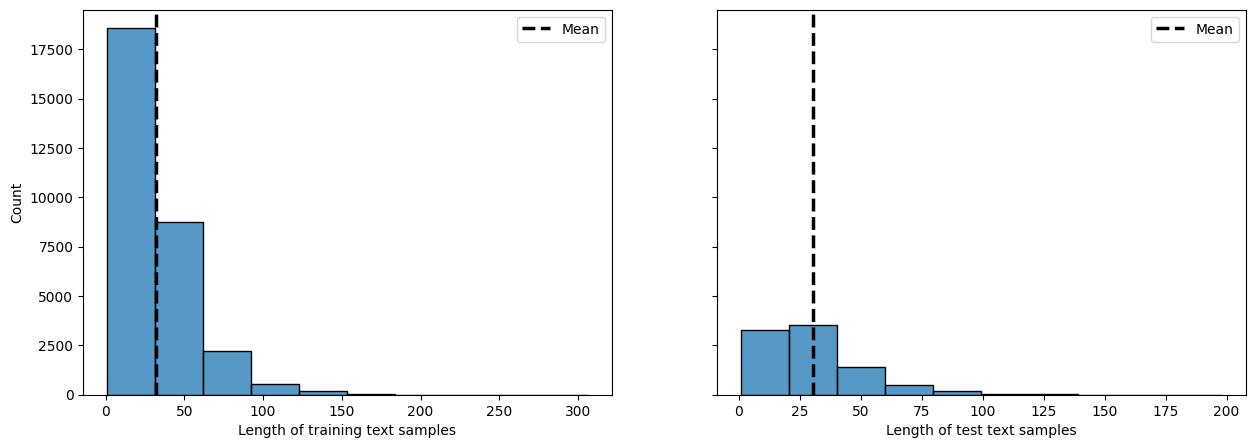

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

train_lengths = train_df["Contents"].str.len()
sns.histplot(ax=axes[0], data=train_lengths, bins=10).set(xlabel="Length of training text samples")
axes[0].axvline(train_lengths.mean(), c="k", ls="--", lw=2.5, label="Mean")
axes[0].legend()

test_lengths = test_df["Contents"].str.len()
sns.histplot(ax=axes[1], data=test_lengths, bins=10).set(xlabel="Length of test text samples")
axes[1].axvline(test_lengths.mean(), c="k", ls="--", lw=2.5, label="Mean")
axes[1].legend()


plt.show()

In [16]:
test_df.shape

(8941, 1)

In [17]:
import re

train_corpus = train_df["Contents"].sum()
test_corpus = test_df["Contents"].sum()

# Remove punctuations
chars_to_ignore = '[-,\.:;\'"!\?।]'

train_corpus = re.sub(chars_to_ignore, ' ', train_corpus)
train_vocab = set(train_corpus.split())

test_corpus = re.sub(chars_to_ignore, ' ', test_corpus)
test_vocab = set(test_corpus.split())

oov = test_vocab - train_vocab

print("Number of unique words in training data:", len(train_vocab))
print("Number of unique words in test data:", len(test_vocab))
print("Number of out-of-vocabulary (OOV) words:", len(oov))

Number of unique words in training data: 29150
Number of unique words in test data: 10568
Number of out-of-vocabulary (OOV) words: 5001


In [18]:
# Filtering text samples that contain English alphanumeric values
filtered_train = train_df[lambda x: x["Contents"].str.contains("[A-Za-z0-9]")]

with pd.option_context('display.max_colwidth', 0):
    display(filtered_train.tail(n=10))

,Contents,IPA


In [19]:
bangla_numerals = "[০১২৩৪৫৬৭৮৯]"

filtered_train = train_df[lambda x: x["Contents"].str.contains(bangla_numerals)]
filtered_test = test_df[lambda x: x["Contents"].str.contains(bangla_numerals)]

print("Number of training samples containing Bangla numerals:", len(filtered_train))
print("Number of test samples containing Bangla numerals:", len(filtered_test))

Number of training samples containing Bangla numerals: 2
Number of test samples containing Bangla numerals: 2


In [20]:
# For calculating WER (Word Error Rate)
! pip install jiwer

In [21]:
# Remove English alphanumeric values
alpha_pat = "[a-zA-z0-9]"

train_df["Contents"] = train_df["Contents"].str.replace(alpha_pat, "", regex=True)
test_df["Contents"] = test_df["Contents"].str.replace(alpha_pat, "", regex=True)

In [22]:
test_df.head()

,Contents
Index,
0,এলা সবায় সবার হাতোত <> অসহায় মানুষ আচে?
1,কেউ কারো ইয়া নাই।
2,"এলা ওই যে, কাইলকা ব্যাটায় ইপতারি আনচে, খাইচোং,..."
3,আর মুই আগোত কী করচিনু?
4,"<> আগের কতা বাদ দেও, এলা নাই।"


In [23]:
test_df.shape

(8941, 1)

In [24]:
train_df['Contents'] = train_df['Contents'].str.replace('[,<>।?]-।', '')

In [25]:
test_df['Contents'] = test_df['Contents'].str.replace('[,<>।?]-।', '')

In [26]:
test_df.shape

(8941, 1)

In [27]:
import pandas as pd
import string

# Define translation table to remove punctuation
translator = str.maketrans('', '', string.punctuation)

# Remove punctuation from the 'Contents' column
train_df['Contents'] = train_df['Contents'].apply(lambda x: x.translate(translator))
train_df['IPA'] = train_df['IPA'].apply(lambda x: x.translate(translator))
test_df['Contents'] = test_df['Contents'].apply(lambda x: x.translate(translator))

print("\nDataFrame after removing punctuation:")
print(test_df)


DataFrame after removing punctuation:
                                                Contents
Index                                                   
0                  এলা সবায় সবার  হাতোত  অসহায় মানুষ আচে
1                                      কেউ কারো ইয়া নাই।
2      এলা ওই যে কাইলকা ব্যাটায় ইপতারি আনচে খাইচোং ইপ...
3                                  আর মুই আগোত কী করচিনু
4                              আগের কতা বাদ দেও এলা নাই।
...                                                  ...
8936                    পরে ফ্রেডি তখন পুরা ভাইঙ্গা পরে।
8937          আর ফ্রেডির সাথে আরো কিছু মানুষের পরিচয় হয়।
8938   যে যারা আসলে ওই যারা এলবাম রিলিজ দেয় ওই কোম্পা...
8939   যারা আসলে ফ্রেডির এই জনপ্রিয়তাডা আসলে তারা পছন...
8940                            তারা চাইছিলো ফ্রেডি জানি

[8941 rows x 1 columns]


In [28]:
# Remove the Bengali punctuation character "।" from the 'Contents' column in train_df
train_df['Contents'] = train_df['Contents'].str.replace('।', '')
train_df['IPA'] = train_df['IPA'].str.replace('।', '')
test_df['Contents'] = test_df['Contents'].str.replace('।', '')

# Display the DataFrame after removing punctuation
print("DataFrame after removing punctuation:\n", train_df)


DataFrame after removing punctuation:
                                                 Contents  \
0      লেখিয়্যা কালি দিয়্যা সেই সুন্দর করিয়া এখন সেই ...   
1                              হ একটা ফিল্ডিং গ্রুপ ছিলো   
2      হ ওরে কতা  বুজচি বিষয়টা ওয় তো এখনও বেরাজিল বের...   
3      সিডায় ওই সমায় আমরা ওই কানির রুমটাত যকন আছনো এক...   
4      যকন কী ইয়্যা হইছিল ওই যে সুমন আর হইলো আলম  জাম...   
...                                                  ...   
30306  জানা গেছে বিশ্বের সর্বোচ্চ মিনারের মক্কার দ্বি...   
30307  দুইশো একগম্বুজ মসজিদ এর পরে যেই স্থানডা সবচেয়ে...   
30308        এটি টাঙ্গাইল জেলার দেলদুয়ার উপজেলায় অবস্থিত   
30309  এই মসজিদটি প্রাচীন ঐতিহাসিক মসজিদ হিসেবে বাংলা...   
30310  টাঙ্গাইল শহর থেইকা প্রাহ ছয় কিলোমিটার দক্ষিণে ...   

                                                     IPA  
0      lekʰɪʲt̪ɐ kɐlɪ d̪ɪkt̪ɐ ʃe͡ɪ̯ ʃund̪ɔɾ koɾɪʲɐ ɛk...  
1                             ho ɛktɐ pʰɪldɪŋ gɾup cʰɪlo  
2      ho oɾe kɔt̪ɐ  buɟcɪ bɪʃɔʲtɐ oe̯ t̪o ɛkʰono beɾ...  
3   

In [29]:
test_df.shape

(8941, 1)

In [30]:
# Remove the opening space from each line in the 'Contents' column of train_df
train_df['Contents'] = train_df['Contents'].str.lstrip()
train_df['IPA'] = train_df['IPA'].str.lstrip()
test_df['Contents'] = test_df['Contents'].str.lstrip()

# Display the DataFrame after removing the opening space
print("DataFrame after removing opening space:\n", train_df)


DataFrame after removing opening space:
                                                 Contents  \
0      লেখিয়্যা কালি দিয়্যা সেই সুন্দর করিয়া এখন সেই ...   
1                              হ একটা ফিল্ডিং গ্রুপ ছিলো   
2      হ ওরে কতা  বুজচি বিষয়টা ওয় তো এখনও বেরাজিল বের...   
3      সিডায় ওই সমায় আমরা ওই কানির রুমটাত যকন আছনো এক...   
4      যকন কী ইয়্যা হইছিল ওই যে সুমন আর হইলো আলম  জাম...   
...                                                  ...   
30306  জানা গেছে বিশ্বের সর্বোচ্চ মিনারের মক্কার দ্বি...   
30307  দুইশো একগম্বুজ মসজিদ এর পরে যেই স্থানডা সবচেয়ে...   
30308        এটি টাঙ্গাইল জেলার দেলদুয়ার উপজেলায় অবস্থিত   
30309  এই মসজিদটি প্রাচীন ঐতিহাসিক মসজিদ হিসেবে বাংলা...   
30310  টাঙ্গাইল শহর থেইকা প্রাহ ছয় কিলোমিটার দক্ষিণে ...   

                                                     IPA  
0      lekʰɪʲt̪ɐ kɐlɪ d̪ɪkt̪ɐ ʃe͡ɪ̯ ʃund̪ɔɾ koɾɪʲɐ ɛk...  
1                             ho ɛktɐ pʰɪldɪŋ gɾup cʰɪlo  
2      ho oɾe kɔt̪ɐ  buɟcɪ bɪʃɔʲtɐ oe̯ t̪o ɛkʰono beɾ...  
3 

In [31]:
# # Get the contents of line 2 from the train_df["Contents"] column
# line_2_contents = train_df.loc[1, "Contents"]

# # Calculate the number of characters in line 2
# num_characters = len(line_2_contents)

# # Print the result
# print("Number of characters in line 2:", num_characters)


In [32]:
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

# Drop empty rows from the 'Contents' column
train_df = train_df.dropna(subset=['Contents'])
test_df = test_df.dropna(subset=['Contents'])

# Drop empty rows from the 'IPA' column
train_df = train_df.dropna(subset=['IPA'])


# Sort train_df based on the length of strings in the 'Contents' column
# Filter rows where the length of 'Contents' is greater than or equal to 1
train_df = train_df[train_df['Contents'].str.len() >= 1]
# test_df = test_df[test_df['Contents'].str.len() >= 1]



train_df = train_df.iloc[train_df['Contents'].str.len().argsort()]

# Print the sorted DataFrame
print(train_df)


# # Iterate over each row in train_df['Contents']
# count =1 
# for line in train_df_sorted['Contents']:
#     # Check if the line is non-empty
#     if not line.strip():
#         # Print the non-empty line
#         count = count+1 

# count

                                                Contents  \
30                                                     ও   
7105                                                   এ   
23971                                                  ক   
16143                                                  আ   
27914                                                  অ   
...                                                  ...   
22991  তেল রশুনপিয়াইজ এডি দিয়া কড়াইয়ের মাইদ্দে  লাইড়া...   
7254   আপনার শয়তানি  না হেইডা অইছে  আমার তো কোন পতিহি...   
4690   ইন্ডিগো দুইশো ইন্ডিগো দুইশো ইন্ডিগো দুইশো ইন্ড...   
18541  তুঁই যদি একঘইরগে অই মনে গরো তোঁয়ার রুমত হারাদি...   
192    ব্যাবহার যার ভালো থাকবে তার জাগা জমিন এর দরকার...   

                                                     IPA  
30                                                     o  
7105                                                   e  
23971                                                  k  
16143                                      

In [33]:
test_df.shape

(8941, 1)

In [34]:
# train_df.to_csv('train_d2ff.csv', index=False, encoding='utf-8-sig')

In [35]:
# test_df.to_csv('test_d2ff.csv', index=False, encoding='utf-8-sig')

In [36]:
# Remove quotation marks from all strings in the 'Contents' column
# train_df['Contents'] = train_df['Contents'].str.replace('"', '')
# test_df['Contents'] = test_df['Contents'].str.replace('"', '')

# Remove quotation marks from all strings in the 'IPA' column
# train_df['IPA'] = train_df['IPA'].str.replace('"', '')

# Print the DataFrame after removing quotation marks
# print(train_df)


In [37]:
# test_df.to_csv('test_d23ff.csv', index=False, encoding='utf-8-sig')

In [38]:
test_df.shape

(8941, 1)

In [39]:
train_df.head()

,Contents,IPA
30,ও,o
7105,এ,e
23971,ক,k
16143,আ,ɐ
27914,অ,ɔ


In [40]:
# Get the contents of line 2 from the train_df["Contents"] column
line_2_contents = train_df.loc[2, "Contents"]

# Calculate the number of characters in line 2
num_characters = len(line_2_contents)

# Print the result
print("Number of characters in line 2:", num_characters)

Number of characters in line 2: 64


In [41]:
test_df.shape

(8941, 1)

In [42]:
# train_df.to_csv('train_d5ff.csv', index=False, encoding='utf-8-sig')

In [43]:
# test = test_df.iloc[test_df['Contents'].str.len().argsort()]


In [44]:
# test.to_csv('test.csv', index=False, encoding='utf-8-sig')

In [45]:
train_df.shape

(30289, 2)

In [46]:
train_df.head

<bound method NDFrame.head of                                                 Contents  \
30                                                     ও   
7105                                                   এ   
23971                                                  ক   
16143                                                  আ   
27914                                                  অ   
...                                                  ...   
22991  তেল রশুনপিয়াইজ এডি দিয়া কড়াইয়ের মাইদ্দে  লাইড়া...   
7254   আপনার শয়তানি  না হেইডা অইছে  আমার তো কোন পতিহি...   
4690   ইন্ডিগো দুইশো ইন্ডিগো দুইশো ইন্ডিগো দুইশো ইন্ড...   
18541  তুঁই যদি একঘইরগে অই মনে গরো তোঁয়ার রুমত হারাদি...   
192    ব্যাবহার যার ভালো থাকবে তার জাগা জমিন এর দরকার...   

                                                     IPA  
30                                                     o  
7105                                                   e  
23971                                                  k  
16143        

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(train_df, test_size=0.1, shuffle=True, random_state=3000)
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

In [48]:
from datasets import Dataset

ds_train = Dataset.from_pandas(train_df)
ds_eval = Dataset.from_pandas(val_df)

In [49]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, DataCollatorForSeq2Seq

model_id = "google/byt5-small"
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForSeq2SeqLM.from_pretrained(model_id)
data_collator = DataCollatorForSeq2Seq(tokenizer)

2024-02-20 10:20:23.316115: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-20 10:20:23.316206: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-20 10:20:23.422630: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


tokenizer_config.json:   0%|          | 0.00/2.59k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/698 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.50k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.20G [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [50]:
def prepare_dataset(sample):
    output = tokenizer(sample["Contents"])
    output["labels"] = tokenizer(sample["IPA"])['input_ids']
    output["length"] = len(output["labels"])
    #print(output)
    return output


ds_train = ds_train.map(prepare_dataset, remove_columns=ds_train.column_names)
ds_eval = ds_eval.map(prepare_dataset, remove_columns=ds_eval.column_names)

  0%|          | 0/27260 [00:00<?, ?ex/s]

  0%|          | 0/3029 [00:00<?, ?ex/s]

In [51]:
import numpy as np
from datasets import load_metric

wer_metric = load_metric("wer")


def compute_metrics(eval_preds):
    preds, labels = eval_preds
    
    if isinstance(preds, tuple):
        preds = preds[0]
    
    preds = np.where(preds != -100, preds, tokenizer.pad_token_id)
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)

    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    result = wer_metric.compute(predictions=decoded_preds, references=decoded_labels)
    return {"wer": result}

In [52]:
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments

model_id = "byt5-bangla-text-to-ipa"

training_args = Seq2SeqTrainingArguments(
    output_dir=model_id,
    group_by_length=True,
    length_column_name="length",
    per_device_train_batch_size=2
,
    per_device_eval_batch_size=8,
    evaluation_strategy="steps",
    metric_for_best_model="wer",
    greater_is_better=False,
    load_best_model_at_end=True,
    num_train_epochs=10,
    save_steps=4000,
    eval_steps=4000,
    logging_steps=4000,
    learning_rate=3e-4,
    weight_decay=1e-2,
    warmup_steps=2000,
    save_total_limit=2,
    predict_with_generate=True,
    generation_max_length=128,
    push_to_hub=False,
    report_to="none",
)

In [53]:
trainer = Seq2SeqTrainer(
    model=model,
    tokenizer=tokenizer,
    args=training_args,
    train_dataset=ds_train,
    eval_dataset=ds_eval,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

trainer.train()

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Step,Training Loss,Validation Loss,Wer
4000,0.526600,0.050205,0.164316
8000,0.046400,0.036135,0.135768
12000,0.035300,0.028444,0.112127
16000,0.025800,0.024048,0.097296
20000,0.022300,0.021282,0.089601
24000,0.015700,0.020767,0.085364
28000,0.015400,0.017973,0.079231
32000,0.011800,0.017591,0.079119


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead u

KeyboardInterrupt: 

In [ ]:
trainer.save_model(model_id)


In [ ]:
test_df.shape

In [ ]:
# Sort by length
index = test_df["Contents"].str.len().sort_values(ascending=False).index
test_df = test_df.reindex(index)

In [ ]:
from transformers import pipeline

pipe = pipeline("text2text-generation", model=model_id, device=0)

In [ ]:
%%time
texts = test_df["Contents"].tolist()
ipas = pipe(texts, max_length=128, batch_size=16)
ipas = [ipa["generated_text"] for ipa in ipas]

In [ ]:
test_df["IPA"] = ipas
test_df = test_df.sort_index()
test_df.head()

In [ ]:
test_df.to_csv("byt5_epoch1_eda.csv", columns=["IPA"])

# submission file er kaj


In [2]:
import pandas as pd 

In [3]:
sub = pd.read_csv("/kaggle/input/asfasdfasdf/byt5_epoch1_eda (4).csv")

In [4]:
sub.shape

(8941, 2)

In [7]:
sub.fillna("a", inplace=True)

# Save the modified DataFrame back to a CSV file
sub.to_csv("/kaggle/working/byt5_epoch1_eda (4)_filled.csv", index=False)